# Лекция 1. Основы Cтатистики ч.2

## Содержание
[2.1 Логистическая регрессия. Постановка задачи](#2.1)  
[2.2 Модель без предикторов. Intercept only model](#2.2)  
[2.3 Модель с одним номинативным предиктором](#2.3)   
[2.4 Модель с двумя номинативными предикторами](#2.4)  
[2.5 ](#2.5)  
[2.6 ](#2.6)  
[2.7 ](#2.7)  

## 2.1 Логистическая регрессия. Постановка задачи<a id='2.1'></a>

### Основные определения и тезисы:   
**Логистическая регрессия** - используется для анализа зависимости междуноминативной зависимой переменной и одной или несколькими независимыми переменными(могут быть как номинативными, так и количественными).  

- p - вероятность положительного исхода;  
- odds - шанс, отношение вероятности успеха Y=1 к вероятности неудачи (Y=0). Принимает значения от 0 до +∞. Если odds > 1, то вероятность положительного исхода больше вероятности отрицательного. Если значения шансов равно единице, то вероятности положительного и отрицательного исхода равны;  
- log(odds) - натуральный логарифм шансов. Принимает значения от -∞ до +∞.  
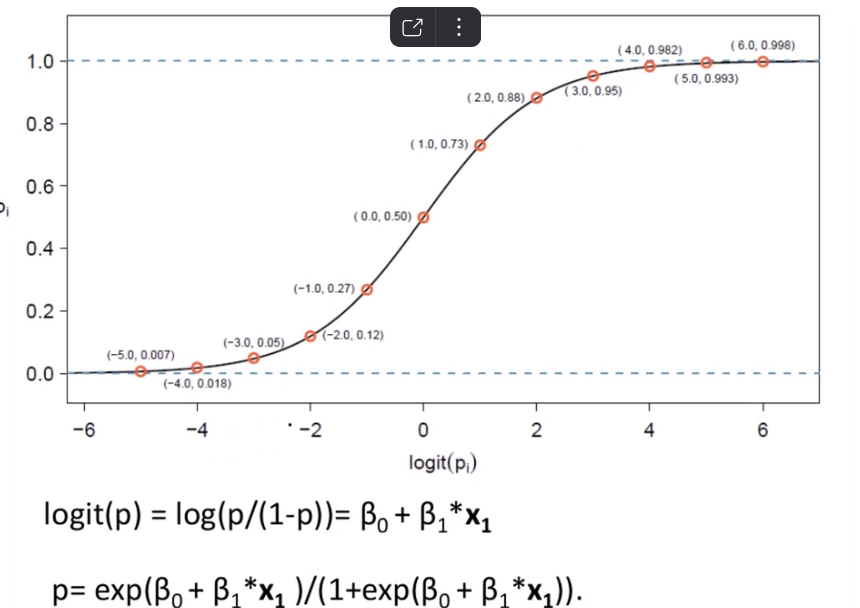  

**Логистическая функция** - преобразует линейную комбинацию независимых переменных в вероятность:  
**P(Y=1) = 1 / (1 + exp(-z))**  
где **P(Y=1)** (*log(odds)*) - вероятность того, что зависимая переменная равна 1, **exp** - экспоненциальная функция, **z** - линейная комбинация независимых переменных.  

**Линейная комбинация независимых переменных** - сумма произведений каждой независимой переменной на ее соответствующий коэффициент модели: **z = β0 + β1 * X1 + ... + βk * Xk**  

### Примеры:

In [13]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" Было 10 бросков монетки и мы получили следующие результаты:
    1 - орел (положительный исход)
    0 - решка (отрицательный исход) """

coin_df = pd.DataFrame({'coin_state': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]})
coin_df.coin_state.value_counts()

0    8
1    2
Name: coin_state, dtype: int64

In [3]:
# рассчет веротности
pos = coin_df.coin_state.value_counts()[1]   # количество положительных исходов
neg = coin_df.coin_state.value_counts()[0]   # количество отрицательных исходов

p = pos / (pos + neg)
p

0.2

In [4]:
# рассчет шанса
odds = pos / neg
odds

0.25

In [5]:
# рассчет вероятности, зная шанс
p = odds / (1 + odds)
p

0.2

In [6]:
# рассчет шанса, зная вероятность
odds = p / (1 - p)
odds

0.25

In [14]:
""" Cоотношение положительных и отрицательных исходов и рассчитанных на их основе вероятность, 
    шанс и натуральный логарифм шансов """

# Вероятность(p)             - число от нуля до единицы
# Шансы(odds)                - число от нуля до плюс бесконечности
# Логарифм шансов(log(odds)) - число от минус бесконечности до плюс бесконечности

coin_df = pd.DataFrame({
    'positive': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'negative': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]})

coin_df["p"] = coin_df.positive / (coin_df.positive + coin_df.negative)
coin_df["odds"] =  round(coin_df.p / (1 - coin_df.p), 2)
coin_df.loc[0, "odds"] = np.nan
coin_df.loc[10, "odds"] = np.nan
coin_df["log(odds)"] =  coin_df["odds"].apply(lambda x: math.log(x) if pd.notnull(x) else None)

coin_df

,positive,negative,p,odds,log(odds)
0,0,10,0.0,NaN,NaN
1,1,9,0.1,0.11,-2.207275
2,2,8,0.2,0.25,-1.386294
3,3,7,0.3,0.43,-0.843970
4,4,6,0.4,0.67,-0.400478
5,5,5,0.5,1.00,0.000000
6,6,4,0.6,1.50,0.405465
7,7,3,0.7,2.33,0.845868
8,8,2,0.8,4.00,1.386294
9,9,1,0.9,9.00,2.197225


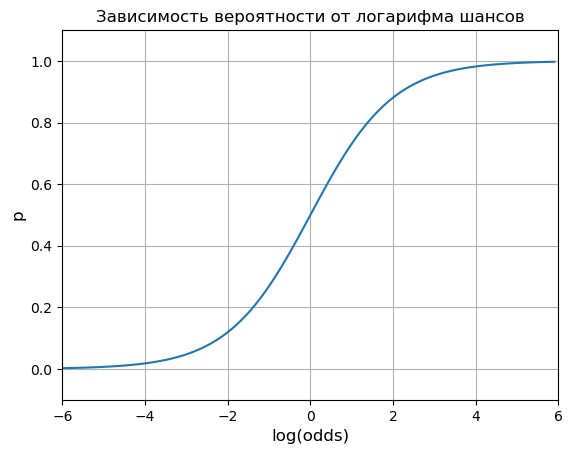

In [15]:
# Визуализация зависимости вероятности от логарифма шансов
log_odds = np.arange(-6, 6, 0.1)
p = np.exp(log_odds) / (1 + np.exp(log_odds))

plt.plot(log_odds, p)
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.title('Зависимость вероятности от логарифма шансов', fontsize=12)
plt.xlabel('log(odds)', fontsize=12)
plt.ylabel('p', fontsize=12)

plt.show()

In [8]:
""" Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. 
    Чему равняется натуральный логарифм шансов выпадения решки?
    
    В этом задании рассматривается как "успех" - выпадение решки."""

n = 100
neg = 70
pos = n - neg

odds = pos / neg
math.log(odds)

# p = 0.3
# log(p / (1-p))

-0.8472978603872037

In [9]:
""" Предположим, что мы получили логарифм шансов выпадения решки, равный -1. 
    Тогда вероятность выпадения решки равняется:"""
log_odds = -1
odds = math.exp(log_odds)
p = odds / (1 + odds)
p

0.2689414213699951

In [10]:
 """Вернемся к уже знакомым нам данным. 
    Рассчитайте логарифм шанса, того что случайно выбранный человек из нашей выборки окажется биологом. """
data = pd.DataFrame({'Юноши': [15, 11, 26], 'Девушки': [9, 6, 15], 'Всего': [24, 17, 41]})
data.rename(index={0: 'Биологи', 1: 'Информатики', 2: 'Всего'}, inplace = True)
data

,Юноши,Девушки,Всего
Биологи,15,9,24
Информатики,11,6,17
Всего,26,15,41


In [11]:
pos = 24
neg = 17

odds = pos / neg
math.log(odds)

0.3448404862917296

## 2.2 Модель без предикторов. Intercept only model<a id='2.2'></a>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
# Data
titanic_df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
titanic_df = titanic_df[titanic_df.Age.notnull()]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
# Intercept - логарифм шансов положительного исхода
# Чтобы рассчитать шанс положительного исхода нужно рассчитать экспоненту значения intercept
glm_binomial = smf.glm(formula='Survived ~ 1', data=titanic_df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# log(odds) = -0.3799

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Mon, 17 Jul 2023   Deviance:                       964.52
Time:                        17:43:23   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

In [41]:
# Распределение частот зависимой переменной
titanic_df.Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

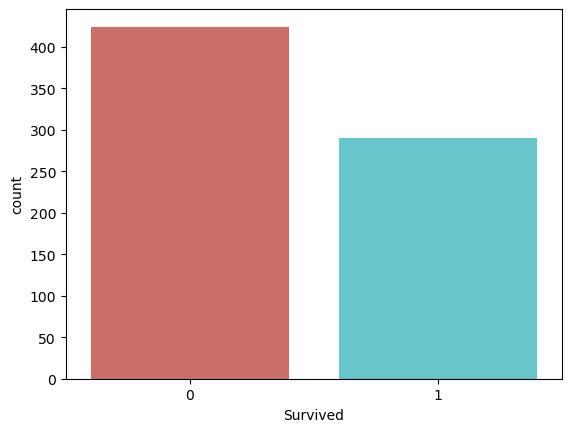

In [42]:
sns.countplot(x='Survived', data=titanic_df, palette='hls')

In [43]:
# Шанс
odds = titanic_df.Survived.value_counts()[1] / titanic_df.Survived.value_counts()[0]
odds

0.6839622641509434

In [44]:
# Логарифм шанса положительного исхода(Intercept)
log_odds = np.log(odds)
log_odds

-0.37985253225143806

In [45]:
glm_binomial.summary()
# P>|z| < 0.05 - intercept значимо отличается от нуля  ->
# log_odds значимо меньше нуля ->
# odds > 1 ->
# p выжить значимо меньше, чем p не выжить

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Mon, 17 Jul 2023   Deviance:                       964.52
Time:                        17:43:25   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

In [46]:
# Вероятность выжить
odds = np.exp(log_odds)
p = odds / (1 + odds)
p

0.4061624649859944

In [47]:
# aic - показатель остатков модели.
# Чем он ниже, тем лучше модель (по аналогии с суммой квадратов остатков в линейной регрессии).
no_predictor_aic = glm_binomial.aic
no_predictor_aic

966.5159648555249

### Примеры:

In [48]:
"""Свободный член логистической регрессии без предикторов, равный 0.5, означает, что"""
log_odds = 0.5 # intercept

# Шанс положительного исхода больше единицы
odds = np.exp(log_odds)
print("Шанс положительного исхода =", odds)
# Вероятность положительного исхода выше вероятности отрицательного исхода
p = odds / (1 + odds)
print("Вероятность положительного исхода =", p)

Шанс положительного исхода = 1.6487212707001282
Вероятность положительного исхода = 0.6224593312018546


__________________________________________________________________________________________________________________
P < 0.05 для свободного члена логистической регрессии означает, что:  
* Распределение исходов в нашей выборке значимо отличается от равномерного  
* Вероятности двух исходов зависимой переменной значимо различаются между собой  
__________________________________________________________________________________________________________________

In [49]:
""" С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, 
    что сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. В нашей выборке было 50 студентов. 
    Часть из них сдала экзамен (положительный исход), а часть - нет (отрицательный исход). 
    Свободный член нашей регрессии оказался равен -0.8472979. Сколько человек всё-таки сдало экзамен?"""
n = 50
log_odds = -0.8472979 # intercept
odds = np.exp(log_odds)
p = odds / (1 + odds)
print(round(n * p), "человек сдало экзамен")

15 человек сдало экзамен


## 2.3 Модель с одним номинативным предиктором<a id='2.3'></a>

**Уравнение регрессии для модели:**  
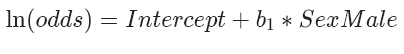  
Значение intercept - это логарифм шансов выжить для женщин:  
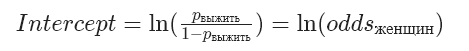  
SexMale - это логарифм отношения шансов выжить для мужчин и шансов выжить для женщин, но по свойству логарифмов можно представить логарифм отношения как разность логарифмов:  
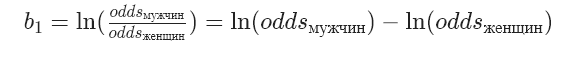  
Таким образом, коэффициент при SexMale - это разность логарифмов шансов. Иными словами, это **цена перехода с одной градации признака на другую**.  

Если новый пассажир - женщина, тогда значение переменной SexMale = 0, то формула регресии:
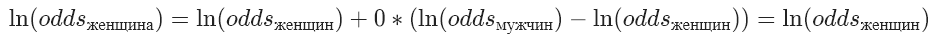  

Для пассажира мужчины, в этом случае SexMale = 1, шансы для женщин сократятся:  
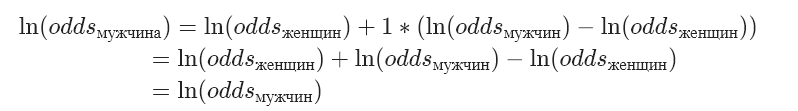

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [51]:
# sklearn
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import LabelEncoder
#df_train = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
#df_train = df_train[df_train.Age.notnull()]
#df_train['sex_cod'] = LabelEncoder().fit_transform(df_train.Sex)  # кодировка переменной "пол" (0, 1)
#x_train = df_train.sex_cod.values.reshape(-1, 1)  # преобразование списка в список списков
#y_train = df_train.Survived
#logreg = LogisticRegression()
#model = logreg.fit(x_train, y_train)
#print(model.intercept_)
#print(model.coef_)

In [52]:
# Data
titanic_df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
titanic_df = titanic_df[titanic_df.Age.notnull()]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# Вычисление
# C(Sex) - указывается, что данные категориальные
glm_binomial = smf.glm(formula='Survived ~ C(Sex)', data=titanic_df, family=sm.families.Binomial()).fit()
glm_binomial.summary()


### coef:
# Intercept      - логарифм шанса выжить для женщин
# C(Sex)[T.male] - логарифм отношения шансов выжить для мужчин к шансам для женщин

# C(Sex)[T.male] = -2.47 - если пассажир мужчина, то вероятность выжить сильно уменьшается

### P>|z|
# Intercept < 0.05 - логарифм шанса выжить для женщин значимо больше 0(вероятность выжить больше чем погибнуть)
# C(Sex)[T.male] < 0.05 -> log(odds_male/odds_female) < 0 ->
# odds_male < 1 ->
# odds_male < odds_female - шансы выжить для женщин значимо больше 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Mon, 17 Jul 2023   Deviance:                       750.70
Time:                        17:43:33   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2588
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1243      0.144      7.814      0.000       0.842       1.406
C(Sex)[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
==================================================================================
"""

In [54]:
# таблица сопряженности между полом и выжил ли человек 
crosstable = pd.crosstab(titanic_df.Survived, titanic_df.Sex)
crosstable

Sex,female,male
Survived,,
0,64,360
1,197,93


Text(0, 0.5, 'Количество')

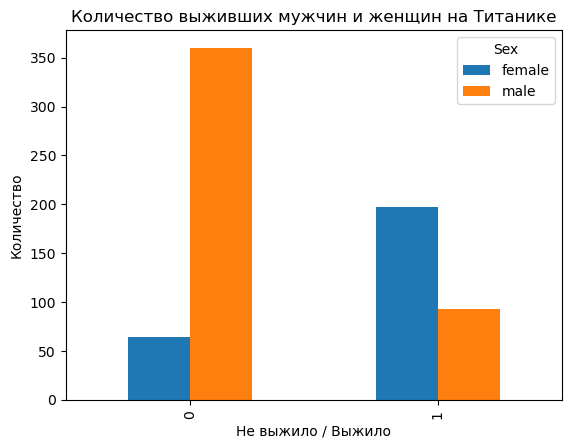

In [55]:
# Визуализация таблицы сопряженности
crosstable.plot(kind='bar')
plt.title('Количество выживших мужчин и женщин на Титанике')
plt.xlabel('Не выжило / Выжило')
plt.ylabel('Количество')

In [56]:
# шанс выжить у мужчин
odds_male = crosstable.male[1] / crosstable.male[0]
print("odds_male =", round(odds_male, 3))
# шанс выжить у женщин
odds_female = crosstable.female[1] / crosstable.female[0]
print("odds_female =", round(odds_female, 3))

# log(odds)
log_odds_male = np.log(odds_male)
print("log_odds_male =", round(log_odds_male, 3))
log_odds_female = np.log(odds_female)       # Intercept/coef
print("log_odds_female =", round(log_odds_female, 3))

# Отношение шансов
odds_ratio = odds_male / odds_female
print("odds_ratio =", round(odds_ratio, 3))

# C(Sex)[T.male]/coef
log_odds_ratio = np.log(odds_ratio)
print("log_odds_ratio =", round(log_odds_ratio, 3))

odds_male = 0.258
odds_female = 3.078
log_odds_male = -1.354
log_odds_female = 1.124
odds_ratio = 0.084
log_odds_ratio = -2.478


In [57]:
# Модель:
# log(odds) = 1.1243 - (2.4778 * Sex_male)

# Если предсказывается логарифм шансов для женщин (Sex_male = 0):
# log(odds) = 1.1243 - (2.4778 * 0)
# log(odds) = 1.1243

# Если предсказывается логарифм шансов для мужчин (Sex_male = 1):
# log(odds) = 1.1243 - (2.4778 * 1)
# log(odds) = 1.1243 - 2.4778
# log(odds) -1.3535

In [59]:
# aic у этой модели ниже, чем у предыдущей, значит эта модель лучше.
sex_aic = glm_binomial.aic
sex_aic

754.7002061466516

### Примеры:

In [61]:
""" Рассчитайте значение экспоненты коэффициентов модели, в поле для ответа введите сумму получившихся чисел. """
intersept = glm_binomial.params[0] # 1.1243
SexMale = glm_binomial.params[1]   # -2.4778

print(np.exp(intersept)) # шанс выжить для женщин
print(np.exp(SexMale))   # отношение шансов выжить мужчин к шансам выжить женщин
np.exp(intersept) + np.exp(SexMale)

3.078124999991266
0.08392554991566786


3.162050549906934

In [62]:
""" А что мы могли бы сделать с нашей регрессионной моделью, чтобы получить значение логарифма шансов для мужчин? """
intersept + SexMale # шанс выжить для мужчин

-1.3535045382965172

In [63]:
""" Во сколько раз шансы выжить для женщин превышают шансы выжить для мужчин? """
# odds_female / odds_male
1 / np.exp(SexMale)

11.915322580606794

In [64]:
""" Давайте посмотрим на результаты регрессии, где зависимая переменная - выжил/не выжил человек в кораблекрушении, 
    предиктор - тип билета (три класса: First, Second, Third)."""
glm_binomial = smf.glm(formula='Survived ~ C(Pclass)', data=titanic_df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Для пассажиров в первом классе вероятность выжить выше вероятности погибнуть.  
# Intercept - это логарифм шансов выжить для пассажиров в первом классе.  
# Шансы выжить для пассажиров в третьем классе значимо ниже по сравнению с пассажирами в первом классе.  
# Шансы выжить для пассажиров во втором классе значимо ниже по сравнению с пассажирами в первом классе.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      711
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -434.91
Date:                Mon, 17 Jul 2023   Deviance:                       869.81
Time:                        17:44:23   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1242
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6451      0.154      4.180      0.000       0.343       0.948
C(Pclass)[T.2]    -0.7261      0.217     -3.350      0.001      -1.151      -0.301
C(Pclass)[T.3]    -1.8009      0.198     -9.086      0.000      -2.189      -1.412
==================================================================================
"""

In [67]:
pclass_aic = glm_binomial.aic
print("no predictors =", no_predictor_aic)
print("sex =", sex_aic)
print("pclass =", pclass_aic)

no predictors = 966.5159648555249
sex = 754.7002061466516
pclass = 875.810262243976


__________________________________________________________________________________________________________________________
Помогите доктору Пилюлькину разобраться в результатах исследования его аспирантов!  

Каждый из аспирантов проводил исследование взаимосвязи результатов лечение (положительные или отрицательные) и типа лекарства (лекарство_1 и лекарство_2).   

Каждый аспирант прислал мозаичный график и значения экспоненты коэффициентов регрессии, которая предсказывала исход лечения, основываясь на типе лекарства (Result ~ Drugs). Соотнесите графики и значения экспоненты коэффициентов логистической регрессии.  
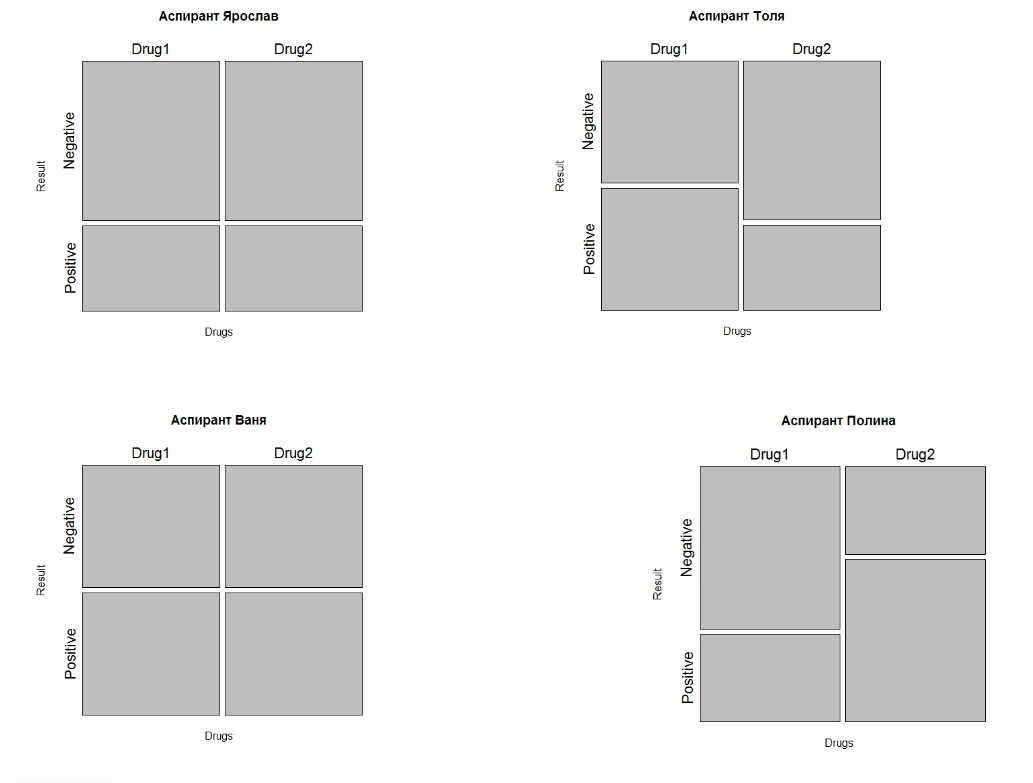  
* Intercept - это шансы положительного исхода Drug1, то есть Positive/Negative для Drug1.  
Когда Positive < Negative  эти шансы  <1 ,  
когда Positive = Negative  интерсепт = 1.  
* DrugDrug2 - это отношение шансов oddsDrug1/oddsDrug2.  
Для  PositiveDrug1 = PositiveDrug2, отношение шансов = 1,  
PositiveDrug1 > PositiveDrug2, отношение шансов > 1,  
PositiveDrug1 < PositiveDrug2, отношение шансов < 1.  

**Ответ:**  
Аспирант Толя    - Intercept = 1, DrugDrug2 = 0.54  
Аспирант Иван    - Intercept = 1, DrugDrug2 = 1  
Аспирант Полина  - Intercept = 0.54, DrugDrug2 = 3.44  
Аспирант Ярослав - Intercept = 0.54, DrugDrug2 = 1





## 2.4 Модель с двумя номинативными предикторами<a id='2.4'></a>